In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
stock_df = pd.read_csv('Official_Data.csv')
stock_df

,Time,Adj Closed Price,Quarterly Return,Stock,Market Sector,Month,month,Quarter,Size,Year
0,01/01/2021,17.374220,0.000000,HAL,Energy,Jan,1,1,Big Cap,2021
1,01/04/2021,19.313990,-0.086751,HAL,Energy,Apr,4,2,Big Cap,2021
2,01/08/2021,19.768332,-0.033849,HAL,Energy,Aug,8,3,Big Cap,2021
3,01/12/2021,22.678337,0.059287,HAL,Energy,Dec,12,4,Big Cap,2021
4,01/01/2021,1835.739990,0.000000,GOOG,Communication Services,Jan,1,1,Mega Cap,2021
...,...,...,...,...,...,...,...,...,...,...
115,01/12/2017,284.992889,0.064160,LMT,Industrials,Dec,12,4,Big Cap,2017
116,01/01/2017,147.559998,0.000000,PANW,Information Technology,Jan,1,1,Big Cap,2017
117,01/04/2017,108.410004,-0.265316,PANW,Information Technology,Apr,4,2,Big Cap,2017
118,01/08/2017,132.690002,0.223965,PANW,Information Technology,Aug,8,3,Big Cap,2017


In [4]:
sns.set_style('dark')

[Text(0.5, 1.0, 'abc')]

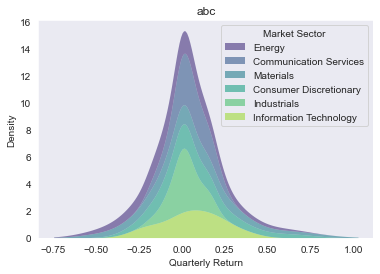

In [6]:
sns.kdeplot(data = stock_df, x = 'Quarterly Return', multiple = 'stack', hue = 'Market Sector',
            palette = 'viridis', alpha = .6, fill = True, common_norm = False, linewidth = 0).set(title = 'abc')

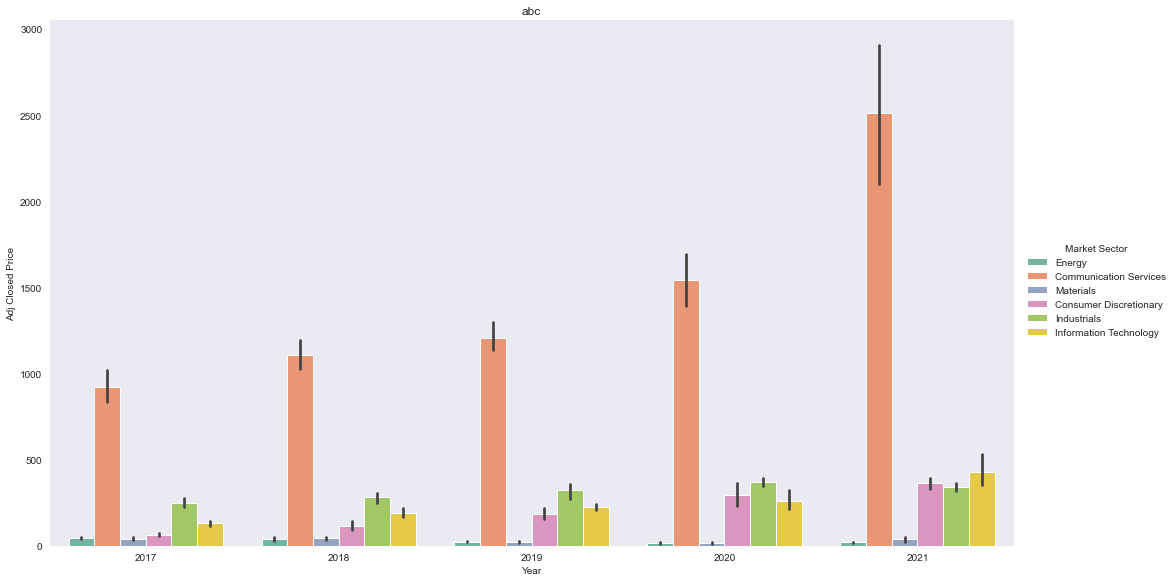

In [7]:
# Bar Plot

# Ý nghĩa:

sns.catplot(data = stock_df, x = 'Year', y = 'Adj Closed Price',
            hue = 'Market Sector', palette = 'Set2', height = 8, aspect = 1.8, kind = 'bar').set(title = 'abc')


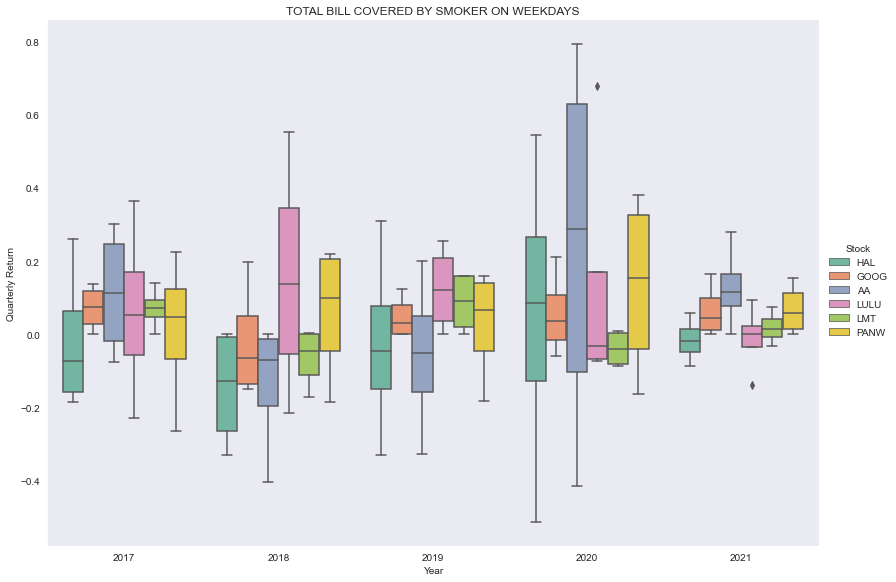

In [8]:
# Box Plot

# Ý nghĩa: 

sns.catplot(data = stock_df, x = 'Year', y = 'Quarterly Return', hue = 'Stock', 
            width = .8, palette = 'Set2', kind = 'box', height = 8, aspect = 1.45).set(title = "TOTAL BILL COVERED BY SMOKER ON WEEKDAYS")

In [9]:
# Tiền xử lý dữ liệu

sts = pd.pivot_table(data = stock_df, index = 'Market Sector', columns = 'Year', values = 'Quarterly Return')
sts.head()

Year,2017,2018,2019,2020,2021
Market Sector,,,,,
Communication Services,0.071958,-0.020721,0.047404,0.056017,0.064113
Consumer Discretionary,0.060646,0.153348,0.123693,0.135241,-0.011359
Energy,-0.018390,-0.146099,-0.027343,0.051154,-0.015328
Industrials,0.071086,-0.064377,0.086134,-0.038704,0.018273
Information Technology,0.012742,0.058744,0.028081,0.131886,0.067645


[Text(0.5, 0, '2017'),
 Text(1.5, 0, '2018'),
 Text(2.5, 0, '2019'),
 Text(3.5, 0, '2020'),
 Text(4.5, 0, '2021')]

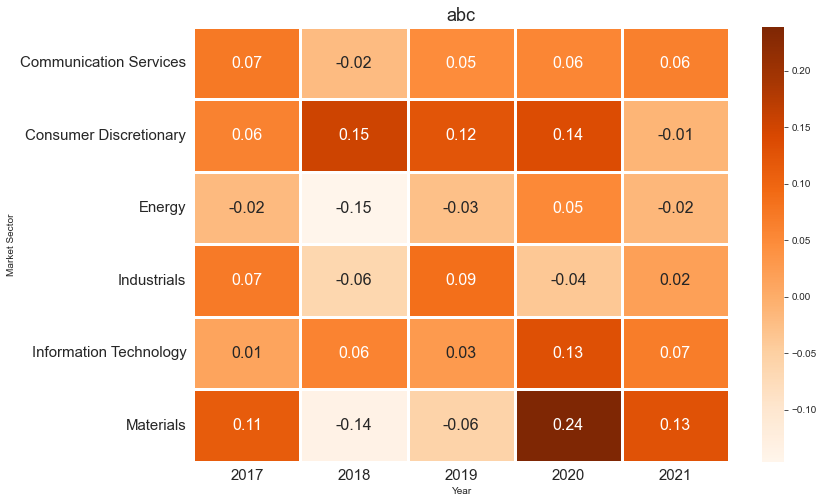

In [10]:
# Heat Map

# Ý nghĩa: 

fig,ax = plt.subplots(figsize = (12,8))
sns.heatmap(data = sts, annot = True, fmt = '.2f',
            linewidths = 3, annot_kws = {'fontsize':16}, cmap = 'Oranges')

title = 'abc'
ax.set_title(title, fontsize = 18)

yticks = sts.index
xticks = sts.columns
ax.set_yticklabels(yticks, rotation = 0, fontsize = 15)
ax.set_xticklabels(xticks, rotation = 0, fontsize = 15)

In [ ]:
tb = sns.lmplot(data = stock_df, x = 'Monthly Return', y = 'Monthly Return', hue = 'Size',
                height = 6, aspect = 1.2)
tb.fig.suptitle('CORRELATION BETWEEN TOTAL BILL  AND TIP BY SMOKER') 
tb.fig.subplots_adjust(top = .9) 